## Lab 3: Dealing with Imbalanced Data

### **Objective**:
In this lab, we will explore methods to handle imbalanced datasets using various techniques. Specifically, we will cover:
- Performance evaluation with imbalanced datasets.
- Over-sampling using **SMOTE (Synthetic Minority Over-sampling Technique)**.
- Under-sampling techniques.
- Combining both methods using SMOTE and edited nearest neighbors (SMOTEENN).
- Practical implementation on a classification task.

### **1. Understanding Imbalanced Data**

Imbalanced datasets occur when one class is significantly underrepresented compared to the other(s). This imbalance can lead to models biased toward the majority class.

### Example: Credit Card Fraud Dataset
- **Class 0**: Legitimate transactions (majority class).
- **Class 1**: Fraudulent transactions (minority class).

**Key Metrics for Imbalanced Data**:
- Accuracy may not be a good indicator.
- Use metrics like **Precision**, **Recall**, **F1-score**, and **ROC-AUC** instead.

#### **Step 1.1: Install Required Libraries**

In [1]:
# Install necessary libraries
%pip install imbalanced-learn scikit-learn pandas matplotlib kagglehub


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### **2. Dataset Preparation**

We will use the **credit card fraud detection dataset**. Download the dataset from [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud).

#### **Step 2.1: Load the Dataset**

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import kagglehub
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)
# Load dataset
data = pd.read_csv(path+'/creditcard.csv')

# Check target class distribution
data['Class'].value_counts()

Path to dataset files: /Users/alexs/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


Class
0    284315
1       492
Name: count, dtype: int64

#### **Step 2.2: Preprocess the Data**

In [3]:
# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

### **3. Baseline Model Without Handling Imbalance**

#### **Step 3.1: Train a Baseline Random Forest Classifier**

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Evaluate performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
 [[85290     5]
 [   36   112]]


**Observation**: High accuracy but poor recall for the minority class (fraud cases).

### **4. Over-Sampling Using SMOTE**

**SMOTE** creates synthetic samples for the minority class by interpolating between existing samples.

#### **Step 4.1: Apply SMOTE**

In [5]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:\n", pd.Series(y_train_smote).value_counts())

Class distribution after SMOTE:
 Class
0    199020
1    199020
Name: count, dtype: int64


#### **Step 4.2: Train and Evaluate the Model After SMOTE**

In [6]:
# Train Random Forest on SMOTE data
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

# Predict on test set
y_pred_smote = rf_smote.predict(X_test)

# Evaluate performance
print("Classification Report after SMOTE:\n", classification_report(y_test, y_pred_smote))
print("Confusion Matrix after SMOTE:\n", confusion_matrix(y_test, y_pred_smote))

Classification Report after SMOTE:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.78      0.83       148

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix after SMOTE:
 [[85281    14]
 [   32   116]]


**Observation**: Recall for the minority class improves.

### **5. Under-Sampling**

Under-sampling reduces the size of the majority class to match the minority class. This can lead to information loss but balances the dataset.

#### **Step 5.1: Apply Under-Sampling**

In [7]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize under-sampler
undersample = RandomUnderSampler(random_state=42)

# Apply under-sampling
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

# Check class distribution after under-sampling
print("Class distribution after Under-Sampling:\n", pd.Series(y_train_under).value_counts())

Class distribution after Under-Sampling:
 Class
0    344
1    344
Name: count, dtype: int64


#### **Step 5.2: Train and Evaluate the Model After Under-Sampling**

In [8]:
# Train Random Forest on under-sampled data
rf_under = RandomForestClassifier(random_state=42)
rf_under.fit(X_train_under, y_train_under)

# Predict on test set
y_pred_under = rf_under.predict(X_test)

# Evaluate performance
print("Classification Report after Under-Sampling:\n", classification_report(y_test, y_pred_under))
print("Confusion Matrix after Under-Sampling:\n", confusion_matrix(y_test, y_pred_under))

Classification Report after Under-Sampling:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.88      0.13       148

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443

Confusion Matrix after Under-Sampling:
 [[83647  1648]
 [   18   130]]


In [6]:
from imblearn.under_sampling import NearMiss

# Initialize NearMiss under-sampler
nearmiss = NearMiss(version=1)

# Apply NearMiss under-sampling
X_train_nm, y_train_nm = nearmiss.fit_resample(X_train, y_train)

# Check class distribution after NearMiss
print("Class distribution after NearMiss:\n", pd.Series(y_train_nm).value_counts())

# Train Random Forest on NearMiss under-sampled data
rf_nm = RandomForestClassifier(random_state=42)
rf_nm.fit(X_train_nm, y_train_nm)

# Predict on test set
y_pred_nm = rf_nm.predict(X_test)

# Evaluate performance
print("\nClassification Report after NearMiss Under-Sampling:\n", classification_report(y_test, y_pred_nm))
print("\nConfusion Matrix after NearMiss Under-Sampling:\n", confusion_matrix(y_test, y_pred_nm))


Class distribution after NearMiss:
 Class
0    344
1    344
Name: count, dtype: int64

Classification Report after NearMiss Under-Sampling:
               precision    recall  f1-score   support

           0       1.00      0.05      0.10     85295
           1       0.00      0.98      0.00       148

    accuracy                           0.05     85443
   macro avg       0.50      0.52      0.05     85443
weighted avg       1.00      0.05      0.10     85443


Confusion Matrix after NearMiss Under-Sampling:
 [[ 4326 80969]
 [    3   145]]


### **6. Combining Over-Sampling and Under-Sampling: SMOTEENN**

**SMOTEENN** combines SMOTE with under-sampling (edited nearest neighbors).

#### **Step 6.1: Apply SMOTEENN**

In [7]:
from imblearn.combine import SMOTEENN

# Initialize SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# Apply SMOTEENN
X_train_smote_enn, y_train_smote_enn = smote_enn.fit_resample(X_train, y_train)

# Check class distribution
print("Class distribution after SMOTEENN:\n", pd.Series(y_train_smote_enn).value_counts())

Class distribution after SMOTEENN:
 Class
1    199020
0    198683
Name: count, dtype: int64


#### **Step 6.2: Train and Evaluate the Model After SMOTEENN**

In [8]:
# Train Random Forest on SMOTEENN data
rf_smote_enn = RandomForestClassifier(random_state=42)
rf_smote_enn.fit(X_train_smote_enn, y_train_smote_enn)

# Predict on test set
y_pred_smote_enn = rf_smote_enn.predict(X_test)

# Evaluate performance
print("Classification Report after SMOTEENN:\n", classification_report(y_test, y_pred_smote_enn))
print("Confusion Matrix after SMOTEENN:\n", confusion_matrix(y_test, y_pred_smote_enn))

Classification Report after SMOTEENN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.78      0.78      0.78       148

    accuracy                           1.00     85443
   macro avg       0.89      0.89      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix after SMOTEENN:
 [[85262    33]
 [   32   116]]


### **7. Evaluating Performance Using ROC-AUC**

In addition to classification metrics, the **ROC-AUC** score is useful for imbalanced datasets.

#### **Step 7.1: Plot the ROC Curve**

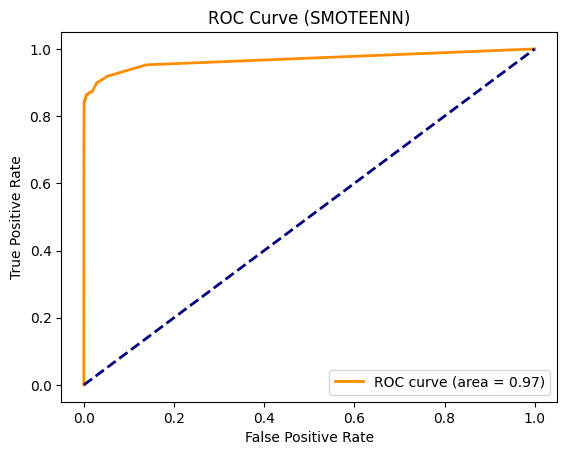

In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(y_test, y_pred_prob, label):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({label})')
    plt.legend(loc="lower right")
    plt.show()

# Get predicted probabilities for SMOTEENN model
y_pred_prob_smote_enn = rf_smote_enn.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_pred_prob_smote_enn, "SMOTEENN")

### **8. Summary and Insights**

In this lab, you:
- Explored the challenges of imbalanced data.
- Applied over-sampling (SMOTE), under-sampling, and a combination of both (SMOTEENN).
- Compared the performance of these techniques using classification metrics and ROC-AUC.

### Homework: Hyperparameter Tuning with GridSearchCV

#### Objective: 
Tune the hyperparameters of a Random Forest classifier to improve its performance on an imbalanced dataset handled using SMOTE or other techniques.

#### Steps:

1. Load and Preprocess the Data

   •	Use the preprocessed data from the earlier lab sections, including SMOTE, under-sampling, or SMOTEENN.
   
2. Define the Hyperparameter Search Space

   •	Explore hyperparameters for the Random Forest, such as:

     •	n_estimators: Number of trees in the forest.

     •	max_depth: Maximum depth of the tree.

     •	min_samples_split: Minimum number of samples required to split an internal node.

     •	min_samples_leaf: Minimum number of samples required to be a leaf node.

     •	max_features: Number of features to consider for the best split.

2. Use GridSearchCV for Hyperparameter Tuning

   •	Perform cross-validation on the imbalanced dataset (handled using SMOTE or other techniques).

   •	Evaluate the tuned model using metrics like F1-score, precision, recall, and ROC-AUC.

4. Analyze Results

   •	Compare the performance of the tuned model to the default Random Forest model.
   
   •	Discuss trade-offs and improvements achieved.

In [12]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, roc_auc_score
import numpy as np


In [13]:
# Compare with default Random Forest
default_rf = RandomForestClassifier(random_state=42)
default_rf.fit(X_train, y_train)
y_pred_default = default_rf.predict(X_test)

In [14]:

# Define the parameter grid
param_grid = {
    'n_estimators': [50,100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define scoring metrics
scoring = {
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'roc_auc': make_scorer(roc_auc_score)
}


In [15]:

# Initialize GridSearchCV
grid_search  = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=scoring,
    refit='f1',  # Use F1 score to select best model
    cv=5,
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)


In [16]:

# Fit the model using SMOTE-balanced training data
grid_search.fit(X_train_smote, y_train_smote)

# Print best parameters and scores
print("Best parameters:", grid_search.best_params_)
print("\nBest F1 score:", grid_search.best_score_)

# Get the best model
best_rf_smote = grid_search.best_estimator_

# Evaluate on test set
y_pred_smote = best_rf_smote.predict(X_test)
print("\nTest Set Performance SMOTE:")
print("F1 Score:", f1_score(y_test, y_pred_smote))
print("Precision:", precision_score(y_test, y_pred_smote))
print("Recall:", recall_score(y_test, y_pred_smote))
print("ROC AUC:", roc_auc_score(y_test, y_pred_smote))

print("\nDefault Random Forest Test Set Performance:")
print("F1 Score:", f1_score(y_test, y_pred_default))
print("Precision:", precision_score(y_test, y_pred_default))
print("Recall:", recall_score(y_test, y_pred_default))
print("ROC AUC:", roc_auc_score(y_test, y_pred_default))



Fitting 5 folds for each of 216 candidates, totalling 1080 fits


: 

In [ ]:
grid_search.fit(X_train_under, y_train_under)

# Print best parameters and scores
print("Best parameters:", grid_search.best_params_)
print("\nBest F1 score:", grid_search.best_score_)

# Get the best model
best_rf_under = grid_search.best_estimator_

# Evaluate on test set
y_pred_under = best_rf_under.predict(X_test)
print("\nTest Set Performance Under-Sampling:")
print("F1 Score:", f1_score(y_test, y_pred_under))
print("Precision:", precision_score(y_test, y_pred_under))
print("Recall:", recall_score(y_test, y_pred_under))
print("ROC AUC:", roc_auc_score(y_test, y_pred_under))

print("\nDefault Random Forest Test Set Performance:")
print("F1 Score:", f1_score(y_test, y_pred_default))
print("Precision:", precision_score(y_test, y_pred_default))
print("Recall:", recall_score(y_test, y_pred_default))
print("ROC AUC:", roc_auc_score(y_test, y_pred_default))

In [ ]:
grid_search.fit(X_train_smote_enn, y_train_smote_enn)
# Print best parameters and scores
print("Best parameters:", grid_search.best_params_)
print("\nBest F1 score:", grid_search.best_score_)

# Get the best model
best_rf_smote_enn = grid_search.best_estimator_

# Evaluate on test set
y_pred_smote_enn = best_rf_smote_enn.predict(X_test)
print("\nTest Set Performance SMOTEENN:")
print("F1 Score:", f1_score(y_test, y_pred_smote_enn))
print("Precision:", precision_score(y_test, y_pred_smote_enn))
print("Recall:", recall_score(y_test, y_pred_smote_enn))
print("ROC AUC:", roc_auc_score(y_test, y_pred_smote_enn))



print("\nDefault Random Forest Test Set Performance:")
print("F1 Score:", f1_score(y_test, y_pred_default))
print("Precision:", precision_score(y_test, y_pred_default))
print("Recall:", recall_score(y_test, y_pred_default))
print("ROC AUC:", roc_auc_score(y_test, y_pred_default))